## Grafo Direcional (Completo)

    Dentro da célula de código abaixo, conta o código que utilizamos para plotar o nosso grafo.

Fizemos um grafo direcional, onde cada um dos vértices são times de futebol de diversas ligas, que tiveram suas transferências registradas entre o periodo de 2024 e 2025, ao todo compilamos dados de 313 clubes. Já as arestas, representam cada um dos sentidos das transferências, note que multiplas transferências podem ser feitas num mesmo sentido (nos aprofundamos nisso em outros arquivos), dito isso, visando não fazer uso de grafos direcionais e tendo consciência de que esses casos não representam nem 5% das arestas em um caso de multi grafo, optamos por usar um modelo de grafo simples direcional não-ponderado, registrando informações que podem vir a ser utéis em nossas análises, como datas, nomes, id's (do nosso banco de dados) e valores dentro de cada uma de suas respectivas arestas.


VÉRTICES DO GRAFO: 313
ARESTAS DO GRAFO: 508


<function matplotlib.pyplot.show(close=None, block=None)>

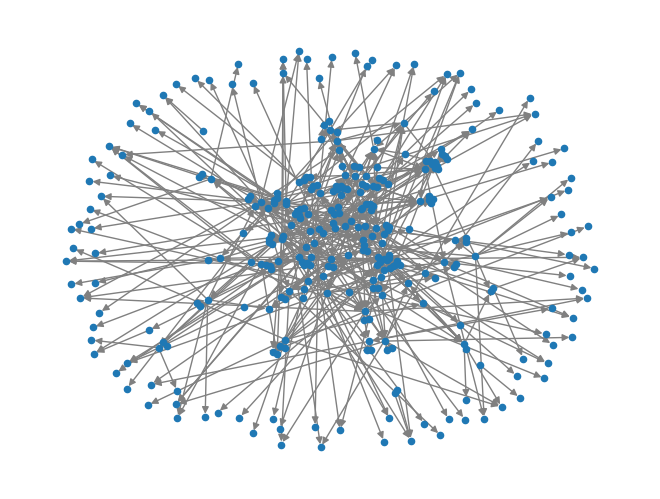

In [ ]:
#Carregamento do arquivo .env
from dotenv import load_dotenv
import os
load_dotenv()

# FETCH da API
import requests
response = requests.get(os.getenv('GET_TRANSFERENCIAS'))
data = response.json()

# Criação do grafo e plotagem dos dados
import networkx as nx
import matplotlib.pyplot as plt

grafo = nx.DiGraph()

if response.status_code == 200:
    conexoes_jogadores = {}

    for registro in data['transferências']:
        if registro['jogador'] not in conexoes_jogadores.keys():
            conexoes_jogadores[registro['jogador']] = []

        conexoes_jogadores[registro['jogador']].append(registro)
        grafo.add_edge(registro['de'], registro['para'], weight=1, transferencias=[], quantidade_transferencias=1) 

    for jogador, conexoes in  conexoes_jogadores.items():
        for conexao in conexoes:
            grafo[conexao['de']][conexao['para']]['transferencias'].append({
                    'data': conexao['data'],
                    'jogador': conexao['jogador'],
                    'valor': conexao['valor'],
                    'id': conexao['id']
                    })
            
            grafo[conexao['de']][conexao['para']]['quantidade_transferencias'] = len(grafo[conexao['de']][conexao['para']]['transferencias'])
 
# Impressão dos vértices e arestas do grafo
print(f'VÉRTICES DO GRAFO: {grafo.number_of_nodes()}')
print(f'ARESTAS DO GRAFO: {grafo.number_of_edges()}')

layout = nx.spring_layout(grafo, k=0.5, scale=50) # Definição do layout usado no grafo

# Desenho do grafo
nx.draw(grafo, node_size=20, edge_color='gray', arrowsize=10)
plt.show

## Análise imediata do Grafo:

    O grafo aparentemente consiste em um macro-bloco onde se concentram transferências e times, que em sua periferia e quase que completamente cercado por vértices menos relevantes, destes a sua maioria, receptores das transferências.